# Experiment 3 - look at accuracies as a function of number of practiced tasks trained
#### Train on both just the affirmative (original) version of sensorimotor task (e.g. "if RED, press LMID")

In [120]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from model import analysis
from model import task
from importlib import reload
import tools
import pandas as pd
analysis = reload(analysis)

In [121]:
datadir = '../../data/results/experiment3/'

# Load data

In [122]:
df_sgd = pd.read_csv(datadir + 'expt3_sgd_150epochs_2layers_pretraining_practice_simData0.csv')
df_sgd.insert(len(df_sgd.columns),"Simulation",list(np.repeat(0,len(df_sgd))),True)
#
df_adam = pd.read_csv(datadir + 'expt3_adam_150epochs_2layers_pretraining_practice_simData0.csv')
df_adam.insert(len(df_adam.columns),"Simulation",list(np.repeat(0,len(df_adam))),True)
#
df_sgd_nopretraining = pd.read_csv(datadir + 'expt3_sgd_150epochs_2layers_practice_simData0.csv')
df_sgd_nopretraining.insert(len(df_sgd_nopretraining.columns),"Simulation",list(np.repeat(0,len(df_adam))),True)
#
df_adam_nopretraining = pd.read_csv(datadir + 'expt3_adam_150epochs_2layers_practice_simData0.csv')
df_adam_nopretraining.insert(len(df_adam_nopretraining.columns),"Simulation",list(np.repeat(0,len(df_adam_nopretraining))),True)

for i in range(1,20):
    tmp = pd.read_csv(datadir + 'expt3_sgd_150epochs_2layers_pretraining_practice_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_sgd = df_sgd.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_adam_150epochs_2layers_pretraining_practice_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_adam = df_adam.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_sgd_150epochs_2layers_practice_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_sgd_nopretraining = df_sgd_nopretraining.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_adam_150epochs_2layers_practice_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_adam_nopretraining = df_adam_nopretraining.append(tmp)

## Accuracy vs. number of practiced tasks

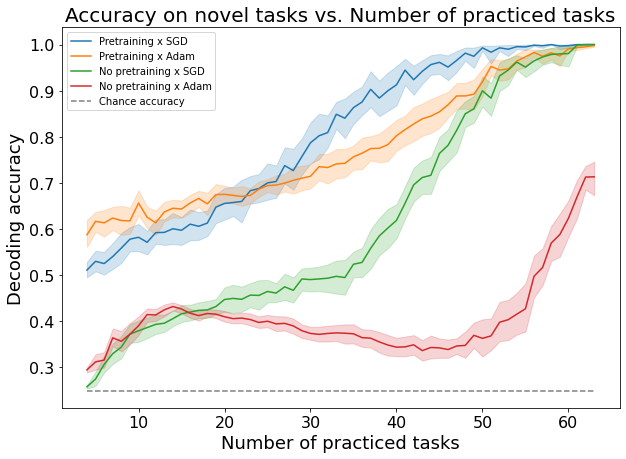

In [123]:
# prac_acc = df.loc[df['Condition']=='Practiced']
# rule2_acc = df.loc[df['Condition']=='2-rule overlap']
# rule1_acc = df.loc[df['Condition']=='1-rule overlap']
plt.figure(figsize=(10,7))
sns.lineplot(x="NumPracticedTasks",y="Accuracy",data=df_sgd,label='Pretraining x SGD')
sns.lineplot(x="NumPracticedTasks",y="Accuracy",data=df_adam,label='Pretraining x Adam')
sns.lineplot(x="NumPracticedTasks",y="Accuracy",data=df_sgd_nopretraining,label='No pretraining x SGD')
sns.lineplot(x="NumPracticedTasks",y="Accuracy",data=df_adam_nopretraining,label='No pretraining x Adam')
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
# plt.plot(np.arange(4,64),np.repeat(.80,len(np.arange(4,64))),'r',linestyle='--',label='Training cut-off on practice')
plt.title('Accuracy on novel tasks vs. Number of practiced tasks', fontsize=20)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylabel('Decoding accuracy', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.legend()

## Dimensionality of hidden layer vs. number of practiced tasks

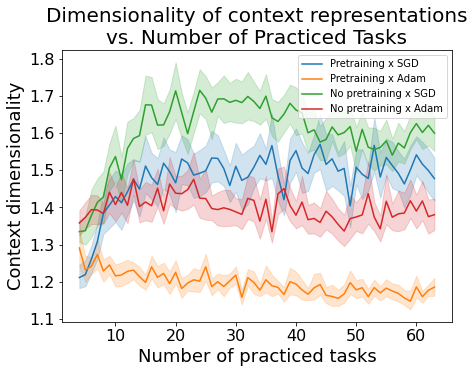

In [124]:
# prac_acc = df.loc[df['Condition']=='Practiced']
# rule2_acc = df.loc[df['Condition']=='2-rule overlap']
# rule1_acc = df.loc[df['Condition']=='1-rule overlap']
plt.figure(figsize=(7,5))
sns.lineplot(x="NumPracticedTasks",y="ContextDimensionality",data=df_sgd,label='Pretraining x SGD')
sns.lineplot(x="NumPracticedTasks",y="ContextDimensionality",data=df_adam,label='Pretraining x Adam')
sns.lineplot(x="NumPracticedTasks",y="ContextDimensionality",data=df_sgd_nopretraining,label='No pretraining x SGD')
sns.lineplot(x="NumPracticedTasks",y="ContextDimensionality",data=df_adam_nopretraining,label='No pretraining x Adam')
plt.title('Dimensionality of context representations\nvs. Number of Practiced Tasks', fontsize=20)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylabel('Context dimensionality', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

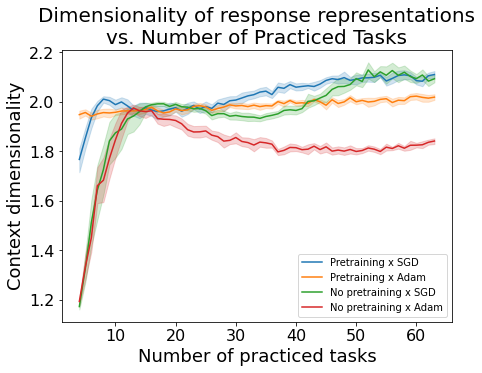

In [125]:
# prac_acc = df.loc[df['Condition']=='Practiced']
# rule2_acc = df.loc[df['Condition']=='2-rule overlap']
# rule1_acc = df.loc[df['Condition']=='1-rule overlap']
plt.figure(figsize=(7,5))
sns.lineplot(x="NumPracticedTasks",y="ResponseDimensionality",data=df_sgd,label='Pretraining x SGD')
sns.lineplot(x="NumPracticedTasks",y="ResponseDimensionality",data=df_adam,label='Pretraining x Adam')
sns.lineplot(x="NumPracticedTasks",y="ResponseDimensionality",data=df_sgd_nopretraining,label='No pretraining x SGD')
sns.lineplot(x="NumPracticedTasks",y="ResponseDimensionality",data=df_adam_nopretraining,label='No pretraining x Adam')
plt.title('Dimensionality of response representations\nvs. Number of Practiced Tasks', fontsize=20)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylabel('Context dimensionality', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

#### Correlate context and response dimensionality for each simulation

In [126]:
df = df_adam
rs = []
simulations = np.unique(df.Simulation.values)
for i in simulations:
    tmpdf = df.loc[df['Simulation']==i]
    contextdim = tmpdf.ContextDimensionality.values
    responsedim = tmpdf.ResponseDimensionality.values
    r, p = stats.spearmanr(contextdim,responsedim)
    rs.append(r)

print('Average corelation across', len(simulations), 'simulations')
print('\tr =', np.mean(rs))
t, p = stats.ttest_1samp(np.arctanh(rs),0)
print('\tt =', t, '| p =', p)

Average corelation across 20 simulations
	r = -0.08844956932481245
	t = -2.907390089200551 | p = 0.009030801360465341


#### Correlate the averaged context and response dimensionality (averaged across simulations)

Correlation of *averaged* context and response dimensionality in hidden layer
	r = -0.7302584051125314
	p = 3.5600735084935444e-11


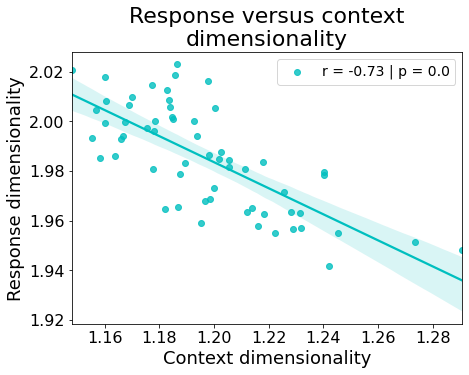

In [127]:
df = df_adam
contextdim = df.groupby('NumPracticedTasks',as_index=False).ContextDimensionality.mean().ContextDimensionality.values
responsedim = df.groupby('NumPracticedTasks',as_index=False).ResponseDimensionality.mean().ResponseDimensionality.values
decodingacc = df.groupby('NumPracticedTasks',as_index=False).Accuracy.mean().Accuracy.values

r, p = stats.spearmanr(contextdim, responsedim)
print('Correlation of *averaged* context and response dimensionality in hidden layer')
print('\tr =', r)
print('\tp =', p)

#
plt.figure(figsize=(7,5))
sns.regplot(x=contextdim,y=responsedim,fit_reg=True,color='c',
            label='r = ' + str(round(r,2)) + ' | p = ' + str(round(p,2)))
plt.title('Response versus context\ndimensionality', fontsize=22)
plt.xlabel('Context dimensionality', fontsize=18)
plt.ylabel('Response dimensionality', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)



#### with standard sgd

Correlation of *averaged* context and response dimensionality in hidden layer
	r = 0.2884690191719923
	p = 0.02540309182100687


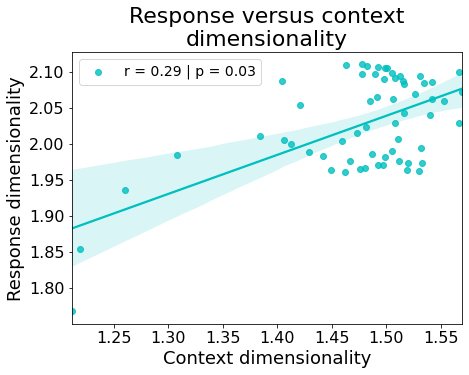

In [128]:
df = df_sgd
contextdim = df.groupby('NumPracticedTasks',as_index=False).ContextDimensionality.mean().ContextDimensionality.values
responsedim = df.groupby('NumPracticedTasks',as_index=False).ResponseDimensionality.mean().ResponseDimensionality.values
decodingacc = df.groupby('NumPracticedTasks',as_index=False).Accuracy.mean().Accuracy.values

r, p = stats.spearmanr(contextdim, responsedim)
print('Correlation of *averaged* context and response dimensionality in hidden layer')
print('\tr =', r)
print('\tp =', p)

#
plt.figure(figsize=(7,5))
sns.regplot(x=contextdim,y=responsedim,fit_reg=True,color='c',
            label='r = ' + str(round(r,2)) + ' | p = ' + str(round(p,2)))
plt.title('Response versus context\ndimensionality', fontsize=22)
plt.xlabel('Context dimensionality', fontsize=18)
plt.ylabel('Response dimensionality', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)


___
# By rule analysis? -- Adam x Pretraining

In [146]:
df_sgd = pd.read_csv(datadir + 'expt3_sgd_150epochs_2layers_pretraining_practice_PerTaskData0.csv')
df_sgd.insert(len(df_sgd.columns),"Simulation",list(np.repeat(0,len(df_sgd))),True)
#
df_adam = pd.read_csv(datadir + 'expt3_adam_150epochs_2layers_pretraining_practice_PerTaskData0.csv')
df_adam.insert(len(df_adam.columns),"Simulation",list(np.repeat(0,len(df_adam))),True)
#
df_sgd_nopretraining = pd.read_csv(datadir + 'expt3_sgd_150epochs_2layers_practice_PerTaskData0.csv')
df_sgd_nopretraining.insert(len(df_sgd_nopretraining.columns),"Simulation",list(np.repeat(0,len(df_adam))),True)
#
df_adam_nopretraining = pd.read_csv(datadir + 'expt3_adam_150epochs_2layers_practice_PerTaskData0.csv')
df_adam_nopretraining.insert(len(df_adam_nopretraining.columns),"Simulation",list(np.repeat(0,len(df_adam_nopretraining))),True)

for i in range(1,13):
    tmp = pd.read_csv(datadir + 'expt3_sgd_150epochs_2layers_pretraining_practice_PerTaskData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_sgd = df_sgd.append(tmp)
#     #
    tmp = pd.read_csv(datadir + 'expt3_adam_150epochs_2layers_pretraining_practice_PerTaskData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_adam = df_adam.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_sgd_150epochs_2layers_practice_PerTaskData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_sgd_nopretraining = df_sgd_nopretraining.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt3_adam_150epochs_2layers_practice_PerTaskData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    df_adam_nopretraining = df_adam_nopretraining.append(tmp)

In [147]:
df = df_adam
logicrules = ['both','either','neither','notboth']
sensoryrules = ['red','vertical','high','constant']
motorrules = ['l_mid','l_ind','r_mid','r_ind']
df_logic = pd.DataFrame({})
df_sensory = pd.DataFrame({})
df_motor = pd.DataFrame({})
# Extract the accuracy values for each rule (novel tasks only)

tmpdf = df.loc[df.Condition=='Novel'] #

for rule in logicrules:
    df_logic = df_logic.append(tmpdf.loc[tmpdf.Logic==rule])
for rule in sensoryrules:
    df_sensory = df_sensory.append(tmpdf.loc[tmpdf.Sensory==rule])
for rule in motorrules:
    df_motor = df_motor.append(tmpdf.loc[tmpdf.Motor==rule])

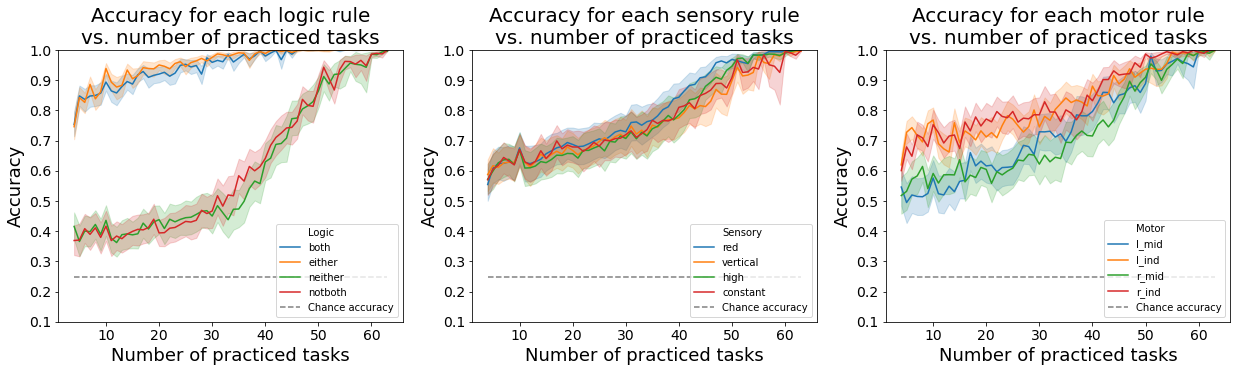

In [148]:
plt.figure(figsize=(21,5))
plt.subplot(131)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Logic",data=df_logic)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
plt.title('Accuracy for each logic rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylim([0.1,1])
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(132)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Sensory",data=df_sensory)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
plt.title('Accuracy for each sensory rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylim([0.1,1])
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(133)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Motor",data=df_motor)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
plt.title('Accuracy for each motor rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylim([0.1,1])
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

___
# By rule analysis? -- SGD x Pretraining

In [149]:
df = df_sgd
logicrules = ['both','either','neither','notboth']
sensoryrules = ['red','vertical','high','constant']
motorrules = ['l_mid','l_ind','r_mid','r_ind']
df_logic = pd.DataFrame({})
df_sensory = pd.DataFrame({})
df_motor = pd.DataFrame({})
# Extract the accuracy values for each rule (novel tasks only)

tmpdf = df.loc[df.Condition=='Novel'] #

for rule in logicrules:
    df_logic = df_logic.append(tmpdf.loc[tmpdf.Logic==rule])
for rule in sensoryrules:
    df_sensory = df_sensory.append(tmpdf.loc[tmpdf.Sensory==rule])
for rule in motorrules:
    df_motor = df_motor.append(tmpdf.loc[tmpdf.Motor==rule])

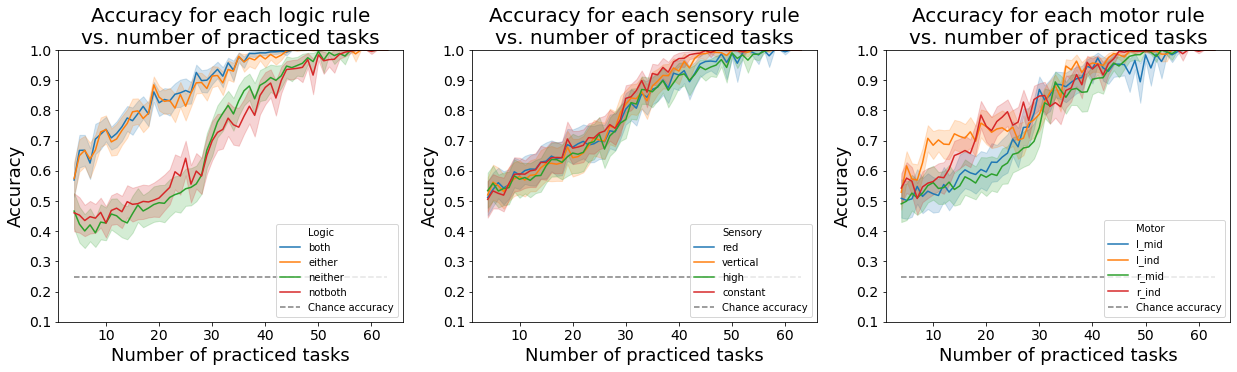

In [150]:
plt.figure(figsize=(21,5))
plt.subplot(131)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Logic",data=df_logic)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
plt.title('Accuracy for each logic rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylim([0.1,1])
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(132)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Sensory",data=df_sensory)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
plt.title('Accuracy for each sensory rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylim([0.1,1])
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(133)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Motor",data=df_motor)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
plt.title('Accuracy for each motor rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylim([0.1,1])
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

___
# By rule analysis? -- SGD x No pretraining

In [151]:
df = df_sgd_nopretraining
logicrules = ['both','either','neither','notboth']
sensoryrules = ['red','vertical','high','constant']
motorrules = ['l_mid','l_ind','r_mid','r_ind']
df_logic = pd.DataFrame({})
df_sensory = pd.DataFrame({})
df_motor = pd.DataFrame({})
# Extract the accuracy values for each rule (novel tasks only)

tmpdf = df.loc[df.Condition=='Novel'] #

for rule in logicrules:
    df_logic = df_logic.append(tmpdf.loc[tmpdf.Logic==rule])
for rule in sensoryrules:
    df_sensory = df_sensory.append(tmpdf.loc[tmpdf.Sensory==rule])
for rule in motorrules:
    df_motor = df_motor.append(tmpdf.loc[tmpdf.Motor==rule])

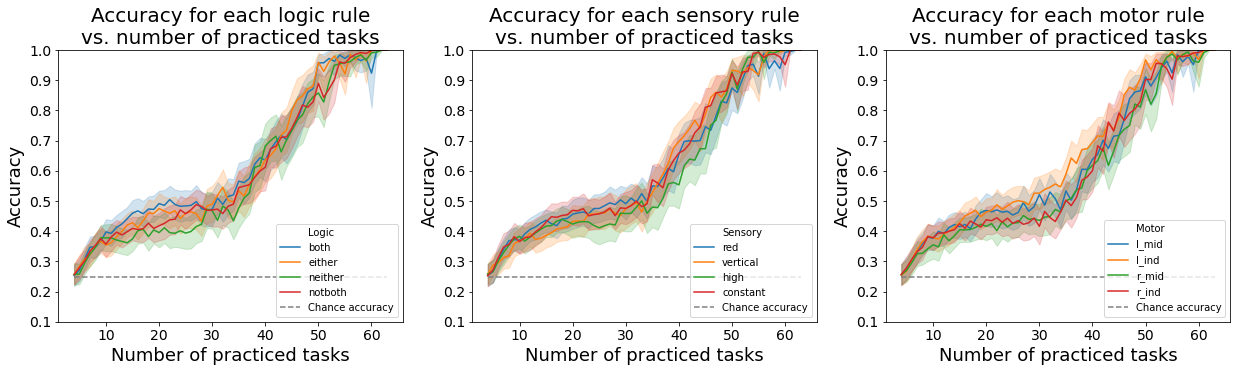

In [152]:
plt.figure(figsize=(21,5))
plt.subplot(131)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Logic",data=df_logic)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
plt.title('Accuracy for each logic rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylim([0.1,1])
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(132)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Sensory",data=df_sensory)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
plt.title('Accuracy for each sensory rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylim([0.1,1])
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(133)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Motor",data=df_motor)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
plt.title('Accuracy for each motor rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylim([0.1,1])
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

___
# By rule analysis? -- Adam x NoPretraining

In [153]:
df = df_adam_nopretraining
logicrules = ['both','either','neither','notboth']
sensoryrules = ['red','vertical','high','constant']
motorrules = ['l_mid','l_ind','r_mid','r_ind']
df_logic = pd.DataFrame({})
df_sensory = pd.DataFrame({})
df_motor = pd.DataFrame({})
# Extract the accuracy values for each rule (novel tasks only)

tmpdf = df.loc[df.Condition=='Novel'] #

for rule in logicrules:
    df_logic = df_logic.append(tmpdf.loc[tmpdf.Logic==rule])
for rule in sensoryrules:
    df_sensory = df_sensory.append(tmpdf.loc[tmpdf.Sensory==rule])
for rule in motorrules:
    df_motor = df_motor.append(tmpdf.loc[tmpdf.Motor==rule])

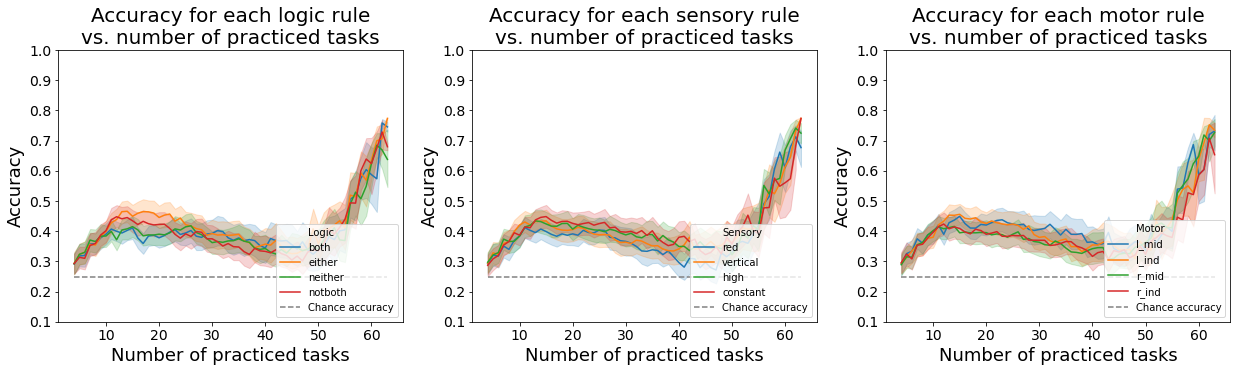

In [154]:
plt.figure(figsize=(21,5))
plt.subplot(131)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Logic",data=df_logic)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
plt.title('Accuracy for each logic rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.ylim([0.1,1])
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(132)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Sensory",data=df_sensory)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
plt.title('Accuracy for each sensory rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylim([0.1,1])
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)

plt.subplot(133)
sns.lineplot(x="NumPracticedTasks",y="Accuracy",hue="Motor",data=df_motor)
plt.plot(np.arange(4,64),np.repeat(.25,len(np.arange(4,64))),'gray',linestyle='--',label='Chance accuracy')
plt.title('Accuracy for each motor rule\nvs. number of practiced tasks',fontsize=20)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Number of practiced tasks', fontsize=18)
plt.ylim([0.1,1])
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(loc=4)